In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the paths for the 4 image datasets
image_path1 = "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/PhD/4th year/Experiments/XCT statistics - particles/images - particles/after stretching/Mat4_scan1_RDND_cropped.png"
image_path2 = "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/PhD/4th year/Experiments/XCT statistics - particles/images - particles/after stretching/Mat5_scan1_RDND_cropped.png"

# Load the images
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)



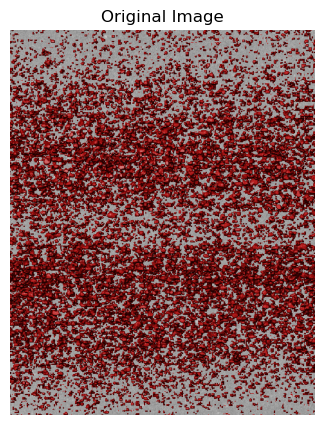

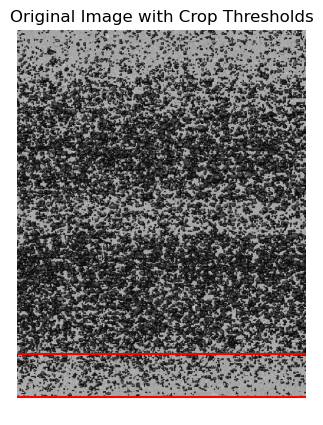

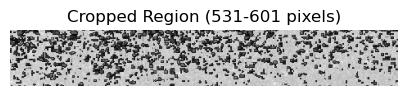

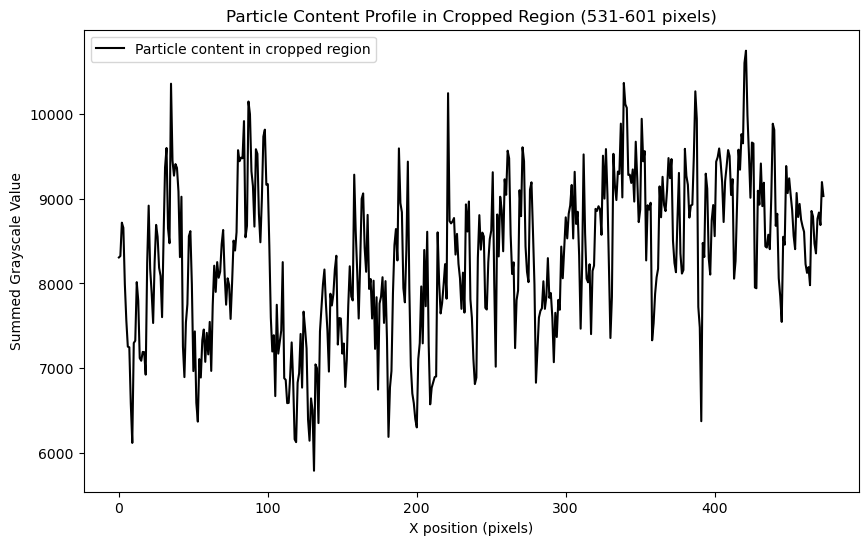

In [3]:
# Step 1: Show the original image
plt.figure(figsize=(5, 5))
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Convert the image to grayscale (this will simplify the detection of particles)
gray_image1 = image1.convert('L')  # 'L' mode is for grayscale

# Convert the grayscale image to a NumPy array
gray_np1 = np.array(gray_image1)

# Define the top and bottom thresholds for cropping the top surface
top_threshold = 0  # Define the top threshold (in pixels from the top)
bottom_threshold = 70  # Define the bottom threshold (in pixels from the top)

# Define the top and bottom thresholds for cropping the bottom surface
#top_threshold = 581  # Define the top threshold (in pixels from the top)
#bottom_threshold = 651  # Define the bottom threshold (in pixels from the top)

# Define the top and bottom thresholds for cropping the bottom surface - stretched samples
top_threshold = 531  # Define the top threshold (in pixels from the top)
bottom_threshold = 601  # Define the bottom threshold (in pixels from the top)



# Crop the region between the top and bottom thresholds
cropped_band1 = gray_np1[top_threshold:bottom_threshold, :]

# Step 1: Show the original grayscale image with lines indicating the cropping thresholds
plt.figure(figsize=(5, 5))
plt.imshow(gray_np1, cmap='gray')
plt.axhline(y=top_threshold, color='red', linestyle='-', label='Top Threshold')
plt.axhline(y=bottom_threshold, color='red', linestyle='-', label='Bottom Threshold')
plt.title('Original Image with Crop Thresholds')
plt.axis('off')
#plt.legend()
plt.show()

# Step 2: Show the cropped region (band) between the top and bottom thresholds
plt.figure(figsize=(5, 5))
plt.imshow(cropped_band1, cmap='gray')
plt.title(f'Cropped Region ({top_threshold}-{bottom_threshold} pixels)')
plt.axis('off')
plt.show()

# Step 3: Calculate and plot the particle content profile in the cropped band
particle_profile = np.sum(cropped_band1, axis=0)

# Step 4: Plot the particle content profile along the x-axis (width)
plt.figure(figsize=(10, 6))
plt.plot(particle_profile, color='black', label='Particle content in cropped region')
plt.xlabel('X position (pixels)')
plt.ylabel('Summed Grayscale Value')
plt.title(f'Particle Content Profile in Cropped Region ({top_threshold}-{bottom_threshold} pixels)')
plt.legend()
plt.show()


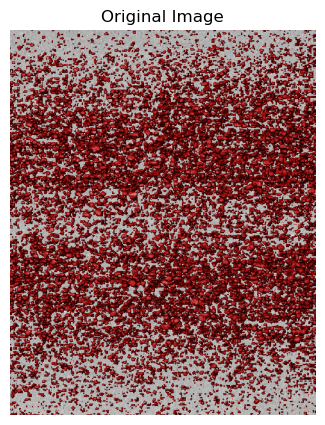

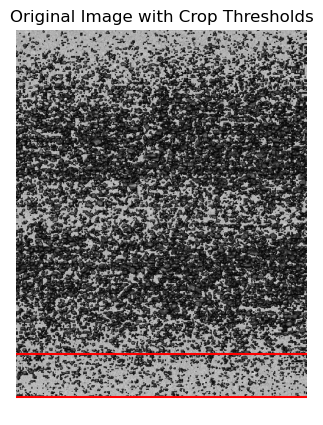

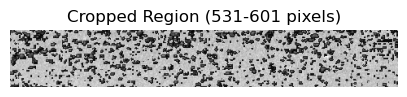

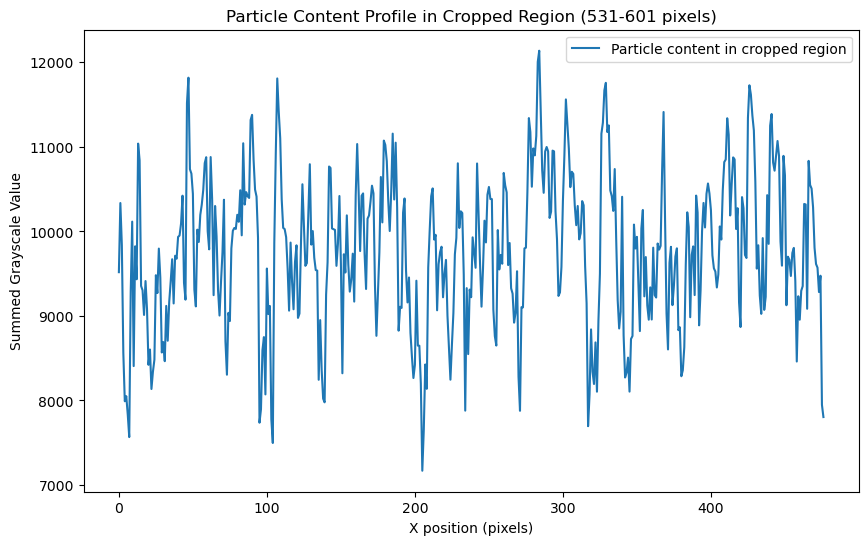

In [4]:
# Step 1: Show the original image
plt.figure(figsize=(5, 5))
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Convert the image to grayscale (this will simplify the detection of particles)
gray_image2 = image2.convert('L')  # 'L' mode is for grayscale

# Convert the grayscale image to a NumPy array
gray_np2 = np.array(gray_image2)


# Crop the region between the top and bottom thresholds
cropped_band2 = gray_np2[top_threshold:bottom_threshold, :]

# Step 1: Show the original grayscale image with lines indicating the cropping thresholds
plt.figure(figsize=(5, 5))
plt.imshow(gray_np2, cmap='gray')
plt.axhline(y=top_threshold, color='red', linestyle='-', label='Top Threshold')
plt.axhline(y=bottom_threshold, color='red', linestyle='-', label='Bottom Threshold')
plt.title('Original Image with Crop Thresholds')
plt.axis('off')
#plt.legend()
plt.show()

# Step 2: Show the cropped region (band) between the top and bottom thresholds
plt.figure(figsize=(5, 5))
plt.imshow(cropped_band2, cmap='gray')
plt.title(f'Cropped Region ({top_threshold}-{bottom_threshold} pixels)')
plt.axis('off')
plt.show()

# Step 3: Calculate and plot the particle content profile in the cropped band
particle_profile = np.sum(cropped_band2, axis=0)

# Step 4: Plot the particle content profile along the x-axis (width)
plt.figure(figsize=(10, 6))
plt.plot(particle_profile, label='Particle content in cropped region')
plt.xlabel('X position (pixels)')
plt.ylabel('Summed Grayscale Value')
plt.title(f'Particle Content Profile in Cropped Region ({top_threshold}-{bottom_threshold} pixels)')
plt.legend()
plt.show()


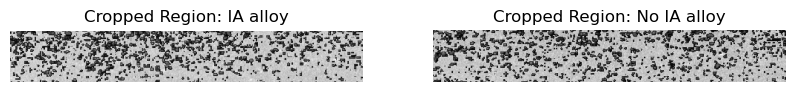

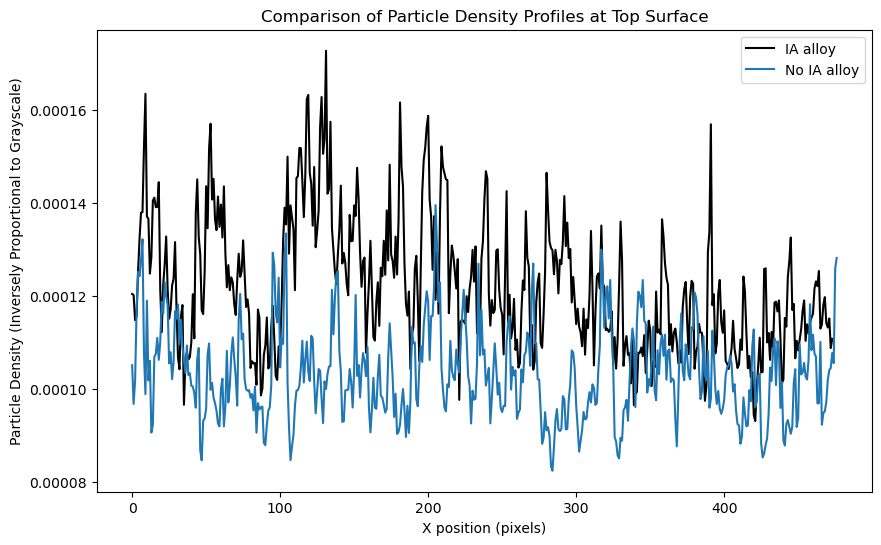

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# Function to calculate particle density and return the cropped image
def calculate_particle_density(image, top_threshold = top_threshold, bottom_threshold =bottom_threshold):
    # Convert the image to grayscale (this will simplify the detection of particles)
    gray_image = image.convert('L')  # 'L' mode is for grayscale

    # Convert the grayscale image to a NumPy array
    gray_np = np.array(gray_image)

    # Crop the top crop_height pixels from the original image (from top to bottom)
    cropped_band = gray_np[top_threshold:bottom_threshold, :]   
    
    epsilon = 1e-5
    inverted_grayscale = 1 / (np.sum(cropped_band, axis=0) + epsilon)

    # Normalize the inverted grayscale values for better visualization (optional)
    particle_density = (inverted_grayscale - np.min(inverted_grayscale)) / (np.max(inverted_grayscale) - np.min(inverted_grayscale))
    #particle_density = inverted_grayscale/np.mean(inverted_grayscale)
    particle_density = inverted_grayscale
    return particle_density, cropped_band

# Step 1: Calculate particle density for both images and get the cropped areas
particle_density1, cropped_image1 = calculate_particle_density(image1)
particle_density2, cropped_image2 = calculate_particle_density(image2)

# Step 2: Plot the cropped regions to verify the correct area is selected
plt.figure(figsize=(10, 5))

# Plot cropped region from the first image
plt.subplot(1, 2, 1)
plt.imshow(cropped_image1, cmap='gray')
plt.title('Cropped Region: IA alloy')
plt.axis('off')

# Plot cropped region from the second image
plt.subplot(1, 2, 2)
plt.imshow(cropped_image2, cmap='gray')
plt.title('Cropped Region: No IA alloy')
plt.axis('off')

plt.show()

# Step 3: Plot both particle density profiles for comparison
plt.figure(figsize=(10, 6))
plt.plot(particle_density1, color='black', label='IA alloy')
plt.plot(particle_density2, label='No IA alloy')
plt.xlabel('X position (pixels)')
plt.ylabel('Particle Density (Inversely Proportional to Grayscale)')
plt.title('Comparison of Particle Density Profiles at Top Surface')
plt.legend()
plt.show()


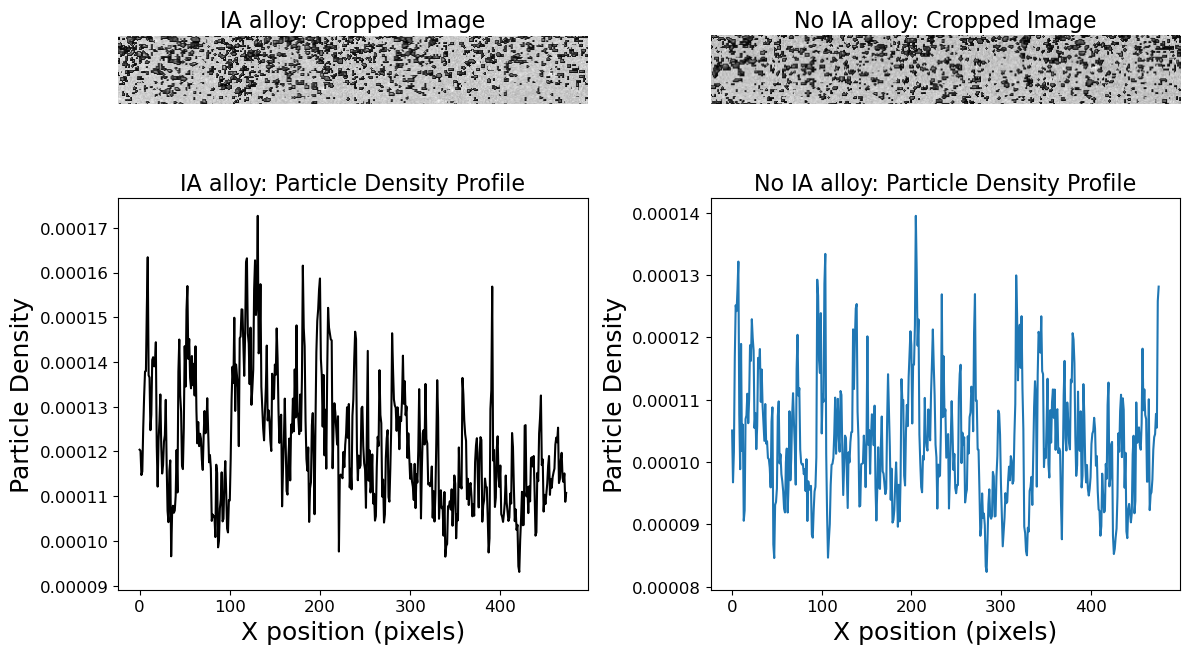

In [6]:


# Step 2: Create a figure with two subplots (image on top, graph below)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1]})

# Plot the cropped region for the first image at the top
axes[0, 0].imshow(cropped_image1, cmap='gray')
axes[0, 0].set_title('IA alloy: Cropped Image', fontsize=16)  # Increased title font size
axes[0, 0].axis('off')

# Plot the cropped region for the second image at the top
axes[0, 1].imshow(cropped_image2, cmap='gray')
axes[0, 1].set_title('No IA alloy: Cropped Image', fontsize=16)  # Increased title font size
axes[0, 1].axis('off')

# Plot the particle density profile for the first image below the image
axes[1, 0].plot(particle_density1, color='black', label='IA alloy (Particle Density)')
axes[1, 0].set_xlabel('X position (pixels)', fontsize=18)  # Increased x-axis label font size
axes[1, 0].set_ylabel('Particle Density', fontsize=18)  # Increased y-axis label font size
axes[1, 0].tick_params(axis='both', labelsize=12)  # Increase tick label size
#axes[1, 0].legend(fontsize=18)  # Increased legend font size
axes[1, 0].set_title('IA alloy: Particle Density Profile', fontsize=16)  # Added title to graph


# Plot the particle density profile for the second image below the image
axes[1, 1].plot(particle_density2, label='No IA alloy (Particle Density)')
axes[1, 1].set_xlabel('X position (pixels)', fontsize=18)  # Increased x-axis label font size
axes[1, 1].set_ylabel('Particle Density', fontsize=18)  # Increased y-axis label font size
axes[1, 1].tick_params(axis='both', labelsize=12)  # Increase tick label size
#axes[1, 1].legend(fontsize=18)  # Increased legend font size
axes[1, 1].set_title('No IA alloy: Particle Density Profile', fontsize=16)  # Added title to graph

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


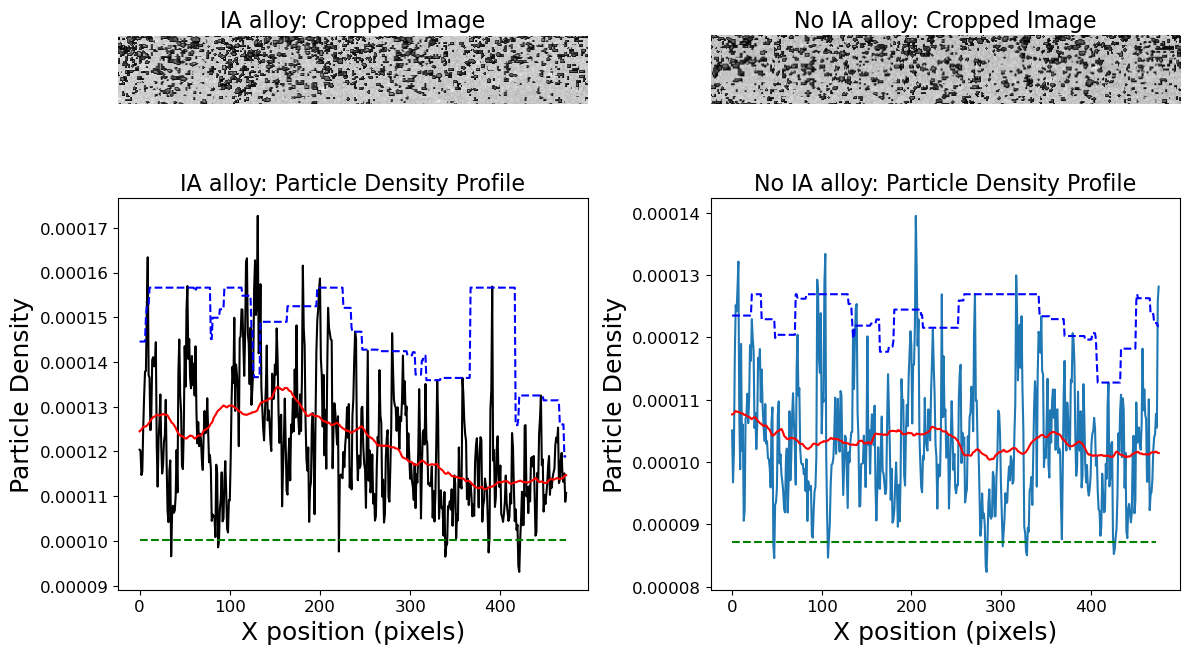

In [7]:
from scipy.ndimage import minimum_filter1d, maximum_filter1d, uniform_filter1d
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a function to calculate the baseline and topline using moving filters
def calculate_baseline_topline(signal, window_size=50, lower_percentile=2, upper_percentile=98):
    # Clip the signal to omit extreme values (remove values below 2nd percentile and above 98th percentile)
    lower_clip = np.percentile(signal, lower_percentile)
    upper_clip = np.percentile(signal, upper_percentile)
    signal_clipped = np.clip(signal, lower_clip, upper_clip)
    
    # Using minimum filter to approximate the baseline (lower peaks)
    baseline = minimum_filter1d(signal_clipped, size=window_size)
    
    # Using maximum filter to approximate the topline (upper peaks)
    topline = maximum_filter1d(signal_clipped, size=window_size)
    
    # Return the baseline (lower peaks) and topline (upper peaks)
    return baseline, topline

# Step 2: Define a function to calculate the trend using a moving average filter
def calculate_trend(signal, window_size=100):
    # Use uniform_filter1d to calculate the moving average (trend)
    return uniform_filter1d(signal, size=window_size)

# Step 3: Calculate the baselines, toplines, and trends for both signals
baseline1, topline1 = calculate_baseline_topline(particle_density1)
baseline2, topline2 = calculate_baseline_topline(particle_density2)



# Calculate the trend for both signals
trend1 = calculate_trend(particle_density1)
trend2 = calculate_trend(particle_density2)

# Calculate mean values for the shifted particle densities
mean_density1 = np.mean(particle_density1)
mean_density2 = np.mean(particle_density2)

# Step 4: Create a figure with two subplots (image on top, graph below)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1]})

# Plot the cropped region for the first image at the top
axes[0, 0].imshow(cropped_image1, cmap='gray')
axes[0, 0].set_title('IA alloy: Cropped Image', fontsize=16)
axes[0, 0].axis('off')

# Plot the cropped region for the second image at the top
axes[0, 1].imshow(cropped_image2, cmap='gray')
axes[0, 1].set_title('No IA alloy: Cropped Image', fontsize=16)
axes[0, 1].axis('off')

# Plot the shifted particle density profile for the first image below the image
axes[1, 0].plot(particle_density1, color='black', label='IA alloy (Shifted Particle Density)')
axes[1, 0].plot(np.median(baseline1) * np.ones_like(particle_density1), color='green', linestyle='--', label='Flat Baseline')  # Flat baseline
axes[1, 0].plot(topline1 - baseline1 + np.median(baseline1), color='blue', linestyle='--', label='Topline')  # Topline
axes[1, 0].plot(trend1, color='red', label='Trend', linestyle='-')  # Plot the trend
axes[1, 0].set_xlabel('X position (pixels)', fontsize=18)
axes[1, 0].set_ylabel('Particle Density', fontsize=18)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].set_title('IA alloy: Particle Density Profile', fontsize=16)
#axes[1, 0].axhline(y=mean_density1, color='red', linestyle='--', label=f'Mean = {mean_density1:.2f}')  # Add horizontal mean line

# Plot the shifted particle density profile for the second image below the image
axes[1, 1].plot(particle_density2, label='No IA alloy (Shifted Particle Density)')
axes[1, 1].plot(np.median(baseline2) * np.ones_like(particle_density1), color='green', linestyle='--', label='Flat Baseline')  # Flat baseline
axes[1, 1].plot(topline2 - baseline2 + np.median(baseline2), color='blue', linestyle='--', label='Topline')  # Topline
axes[1, 1].plot(trend2, color='red', label='Trend', linestyle='-')  # Plot the trend
axes[1, 1].set_xlabel('X position (pixels)', fontsize=18)
axes[1, 1].set_ylabel('Particle Density', fontsize=18)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].set_title('No IA alloy: Particle Density Profile', fontsize=16)
#axes[1, 1].axhline(y=mean_density2, color='red', linestyle='--', label=f'Mean = {mean_density2:.2f}')  # Add horizontal mean line

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


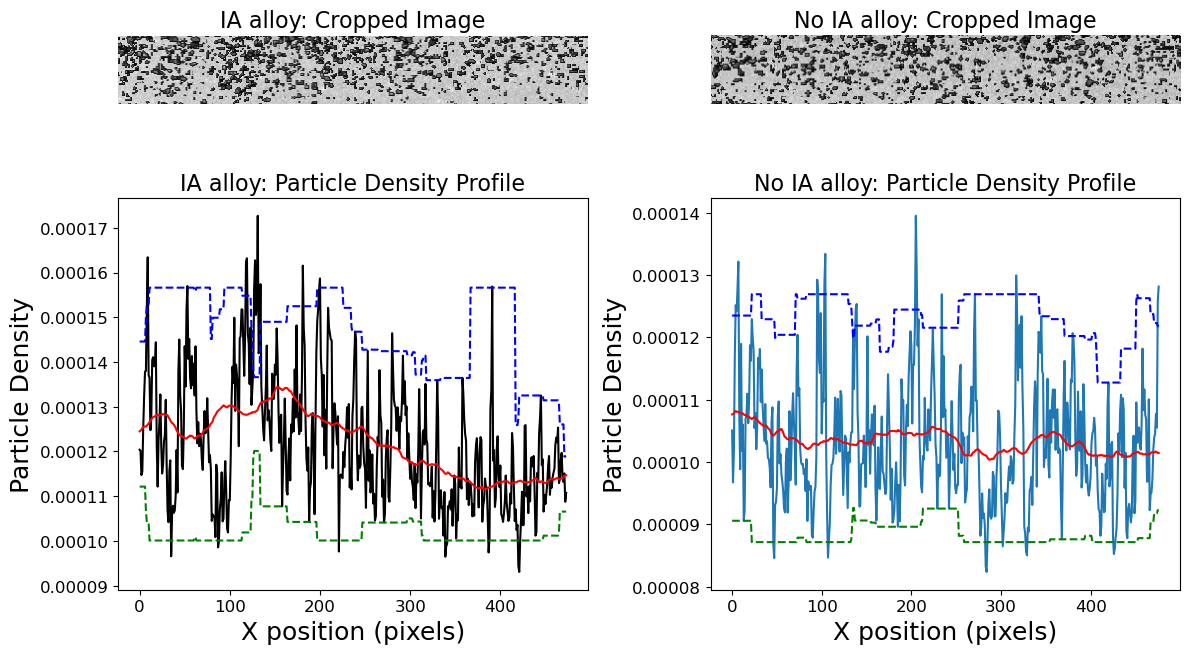

In [8]:
from scipy.ndimage import minimum_filter1d
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a function to calculate the baseline using a moving minimum filter
# while omitting extreme values
def calculate_baseline(signal, window_size=50, lower_percentile=2, upper_percentile=98):
    # Clip the signal to omit extreme values (remove values below 2nd percentile and above 98th percentile)
    lower_clip = np.percentile(signal, lower_percentile)
    upper_clip = np.percentile(signal, upper_percentile)
    signal_clipped = np.clip(signal, lower_clip, upper_clip)
    
    # Using minimum filter to approximate the baseline of the signal after clipping
    baseline = minimum_filter1d(signal_clipped, size=window_size)
    
    return baseline


# Step 2: Calculate the baselines for both signals, omitting extreme values
baseline1 = calculate_baseline(particle_density1)
baseline2 = calculate_baseline(particle_density2)


# Calculate the trend for both signals
trend1 = calculate_trend(particle_density1)
trend2 = calculate_trend(particle_density2)

# Calculate mean values for the particle densities
mean_density1 = np.mean(particle_density1)
mean_density2 = np.mean(particle_density2)



# Step 3: Create a figure with two subplots (image on top, graph below)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1]})

# Plot the cropped region for the first image at the top
axes[0, 0].imshow(cropped_image1, cmap='gray')
axes[0, 0].set_title('IA alloy: Cropped Image', fontsize=16)
axes[0, 0].axis('off')

# Plot the cropped region for the second image at the top
axes[0, 1].imshow(cropped_image2, cmap='gray')
axes[0, 1].set_title('No IA alloy: Cropped Image', fontsize=16)
axes[0, 1].axis('off')

# Plot the particle density profile for the first image below the image
axes[1, 0].plot(particle_density1, color='black', label='IA alloy (Particle Density)')
axes[1, 0].plot(baseline1, color='green', linestyle='--', label='Baseline')  # Plot the baseline
axes[1, 0].plot(topline1 - baseline1 + np.median(baseline1), color='blue', linestyle='--', label='Topline')  # Plot the shifted topline
axes[1, 0].plot(trend1, color='red', label='Trend', linestyle='-')  # Plot the trend
axes[1, 0].set_xlabel('X position (pixels)', fontsize=18)
axes[1, 0].set_ylabel('Particle Density', fontsize=18)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].set_title('IA alloy: Particle Density Profile', fontsize=16)
#axes[1, 0].axhline(y=mean_density1, color='red', linestyle='--', label=f'Mean = {mean_density1:.2f}')  # Add horizontal mean line

# Plot the particle density profile for the second image below the image
axes[1, 1].plot(particle_density2, label='No IA alloy (Particle Density)')
axes[1, 1].plot(baseline2, color='green', linestyle='--', label='Baseline')  # Plot the baseline
axes[1, 1].plot(topline2 - baseline2 + np.median(baseline2), color='blue', linestyle='--', label='Topline')  # Plot the shifted topline
axes[1, 1].plot(trend2, color='red', label='Trend', linestyle='-')  # Plot the trend
axes[1, 1].set_xlabel('X position (pixels)', fontsize=18)
axes[1, 1].set_ylabel('Particle Density', fontsize=18)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].set_title('No IA alloy: Particle Density Profile', fontsize=16)
#axes[1, 1].axhline(y=mean_density2, color='red', linestyle='--', label=f'Mean = {mean_density2:.2f}')  # Add horizontal mean line

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


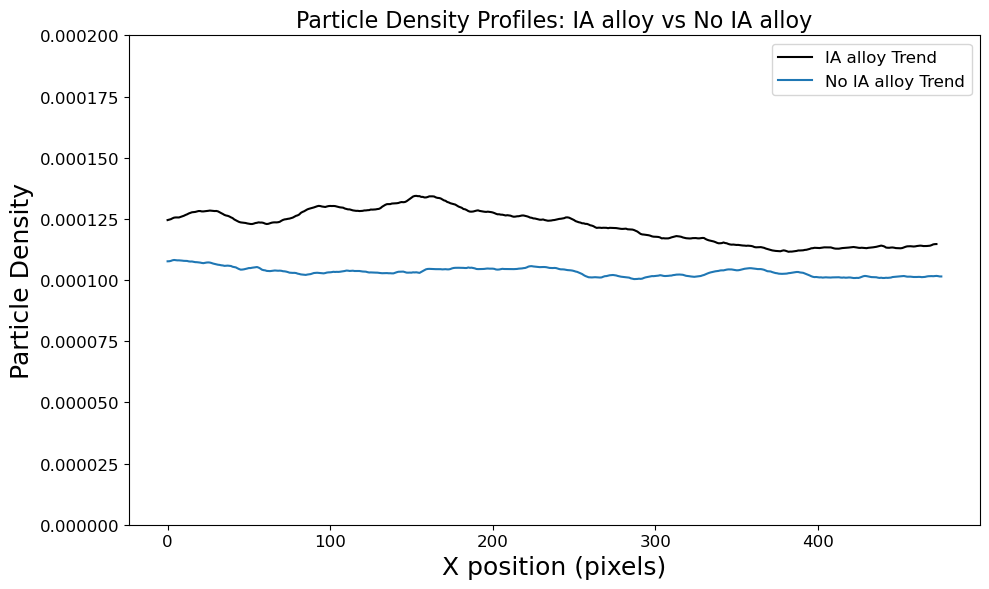

In [9]:
from scipy.ndimage import minimum_filter1d
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a function to calculate the baseline using a moving minimum filter
# while omitting extreme values
def calculate_baseline(signal, window_size=50, lower_percentile=2, upper_percentile=98):
    # Clip the signal to omit extreme values (remove values below 2nd percentile and above 98th percentile)
    lower_clip = np.percentile(signal, lower_percentile)
    upper_clip = np.percentile(signal, upper_percentile)
    signal_clipped = np.clip(signal, lower_clip, upper_clip)
    
    # Using minimum filter to approximate the baseline of the signal after clipping
    baseline = minimum_filter1d(signal_clipped, size=window_size)
    
    return baseline

# Step 2: Calculate the baselines for both signals, omitting extreme values
baseline1 = calculate_baseline(particle_density1)
baseline2 = calculate_baseline(particle_density2)

# Calculate the trend for both signals
def calculate_trend(signal, window_size=100):
    # Use uniform_filter1d to calculate the moving average (trend)
    return uniform_filter1d(signal, size=window_size)

trend1 = calculate_trend(particle_density1)
trend2 = calculate_trend(particle_density2)

# Calculate mean values for the particle densities
mean_density1 = np.mean(particle_density1)
mean_density2 = np.mean(particle_density2)

# Step 3: Create a figure to plot both graphs in the same plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the particle density profile for IA alloy
ax.plot(trend1, color='black', label='IA alloy Trend', linestyle='-')  # Plot the trend

# Plot the particle density profile for No IA alloy on the same plot
ax.plot(trend2, label='No IA alloy Trend', linestyle='-')  # Plot the trend

# Set labels and title
ax.set_xlabel('X position (pixels)', fontsize=18)
ax.set_ylabel('Particle Density', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Particle Density Profiles: IA alloy vs No IA alloy', fontsize=16)

# Add a legend
ax.legend(fontsize=12)
ax.set_ylim(0, 0.0002)  # You can change this range based on your data

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


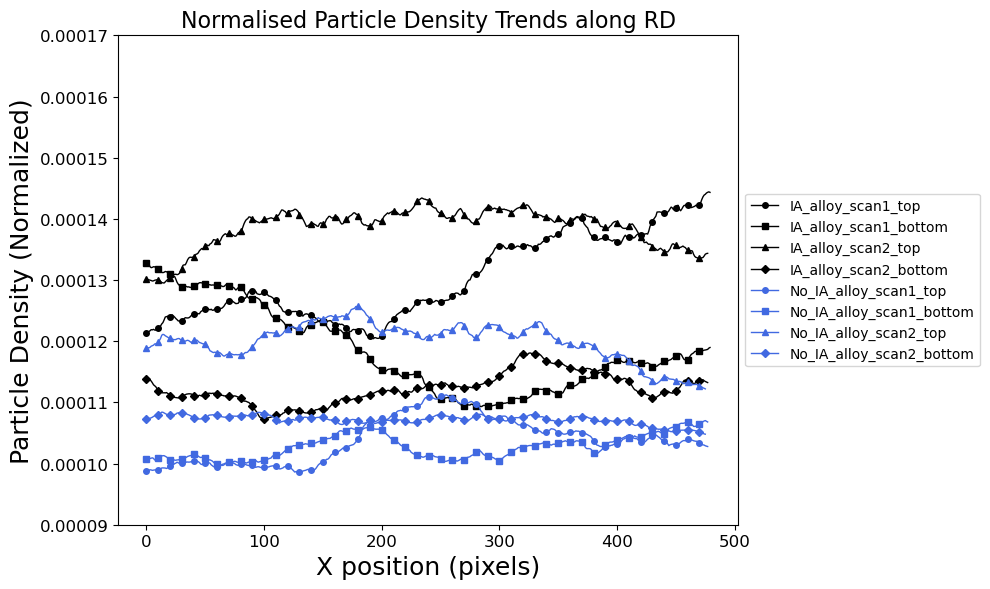

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Step 1: Define the particle density calculation function with normalization
def calculate_particle_density(image, top_threshold, bottom_threshold):
    # Convert the image to grayscale
    gray_image = image.convert('L')  # 'L' mode is for grayscale

    # Convert the grayscale image to a NumPy array
    gray_np = np.array(gray_image)

    # Crop the selected region from the original image
    cropped_band = gray_np[top_threshold:bottom_threshold, :]
    
    # Calculate particle density using the inverse of grayscale intensity
    epsilon = 1e-5
    inverted_grayscale = 1 / (np.sum(cropped_band, axis=0) + epsilon)

    # Normalize the inverted grayscale values to the range [0, 1]
    #particle_density = (inverted_grayscale - np.min(inverted_grayscale)) / (np.max(inverted_grayscale) - np.min(inverted_grayscale))
    particle_density = inverted_grayscale
    
    return particle_density, cropped_band

# Define the trend calculation function
def calculate_trend(signal, window_size=100):
    return uniform_filter1d(signal, size=window_size)

# Define the paths for the 4 image datasets
image_paths = [
    "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/PhD/4th year/Experiments/"
    "XCT statistics - particles/images - particles/Mat2_scan1_RDND_cropped.png",
    "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/PhD/4th year/Experiments/"
    "XCT statistics - particles/images - particles/Mat2_scan2_RDND_cropped.png",
    "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/PhD/4th year/Experiments/"
    "XCT statistics - particles/images - particles/Mat3_scan1_RDND_cropped.png",
    "C:/Users/GlassDesktop/The University of Manchester Dropbox/Laura Gonzalez/Phd/4th year/Experiments/"
    "XCT statistics - particles/images - particles/Mat3_scan2_RDND_cropped.png"
]

# Define the top and bottom thresholds for cropping the top surface
top_threshold_top_surface = 0
bottom_threshold_top_surface = 70

# Define the top and bottom thresholds for cropping the bottom surface
top_threshold_bottom_surface = 581
bottom_threshold_bottom_surface = 651

# Initialize dictionary to store trends
trends = {}

# Variable mapping for naming
names = [
    ("IA_alloy_scan1_top", "IA_alloy_scan1_bottom"),
    ("IA_alloy_scan2_top", "IA_alloy_scan2_bottom"),
    ("No_IA_alloy_scan1_top", "No_IA_alloy_scan1_bottom"),
    ("No_IA_alloy_scan2_top", "No_IA_alloy_scan2_bottom")
]

# Define symbols for IA alloy (black) and No IA alloy (default colors)
symbols_IA_alloy = ['o', 's', '^', 'D']  # Symbols for IA alloy
symbols_No_IA_alloy = ['o', 's', '^', 'D']  # Symbols for No IA alloy

# Loop through each image and process
for i, image_path in enumerate(image_paths):
    # Load the image
    image = Image.open(image_path)
    
    # Step 1: Calculate particle density for the top surface
    particle_density_top, _ = calculate_particle_density(image, top_threshold_top_surface, bottom_threshold_top_surface)
    
    # Step 2: Calculate particle density for the bottom surface
    particle_density_bottom, _ = calculate_particle_density(image, top_threshold_bottom_surface, bottom_threshold_bottom_surface)
    
    # Step 3: Calculate trends for the top and bottom surfaces
    trend_top = calculate_trend(particle_density_top)
    trend_bottom = calculate_trend(particle_density_bottom)
    
    # Store trends for later plotting
    trends[names[i][0]] = trend_top  # Top surface trend
    trends[names[i][1]] = trend_bottom  # Bottom surface trend

# Step 4: Create a figure to plot all particle density trends together
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all trends together, with different styles for IA alloy and No IA alloy
for idx, (label, trend) in enumerate(trends.items()):
    if "No_IA_alloy" in label:
        symbol = symbols_No_IA_alloy[idx % 4]  
        ax.plot(trend, color='royalblue',alpha=1, marker=symbol, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize
    else:
        symbol2 = symbols_IA_alloy[idx % 4]  
        ax.plot(trend, color='black', alpha=1,  marker=symbol2, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize

# Set labels and title
ax.set_xlabel('X position (pixels)', fontsize=18)
ax.set_ylabel('Particle Density (Normalized)', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Normalised Particle Density Trends along RD', fontsize=16)

# Add a legend
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside

#ax.set_ylim(0, 1)  # Since the data is normalized, we set y-limits from 0 to 1

ax.set_ylim(0.00009, 0.00017)  # Since the data is normalized, we set y-limits from 0 to 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


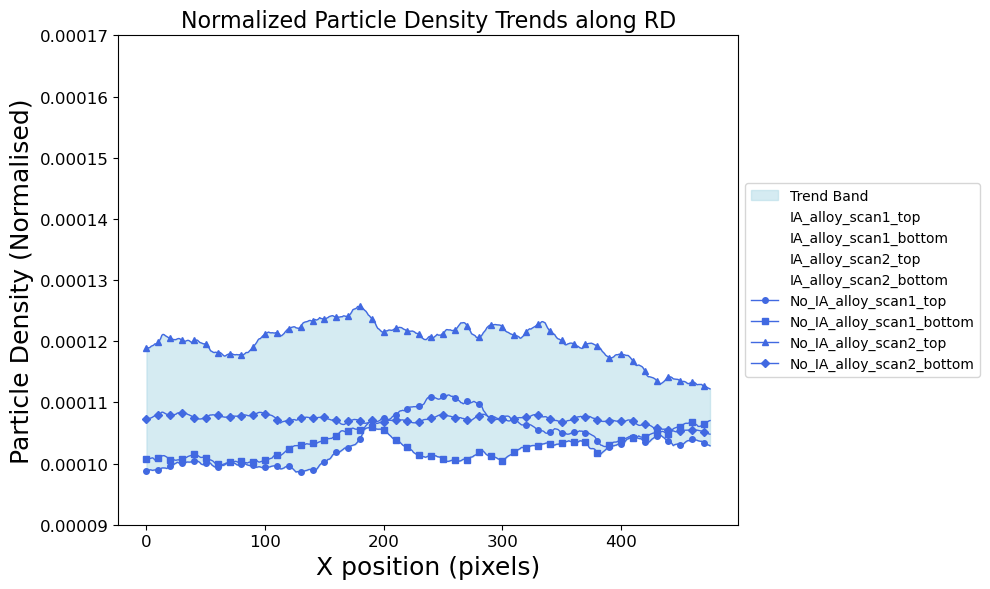

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Step 1: Define the particle density calculation function with normalization
def calculate_particle_density(image, top_threshold, bottom_threshold):
    # Convert the image to grayscale
    gray_image = image.convert('L')  # 'L' mode is for grayscale

    # Convert the grayscale image to a NumPy array
    gray_np = np.array(gray_image)

    # Crop the selected region from the original image
    cropped_band = gray_np[top_threshold:bottom_threshold, :]
    
    # Calculate particle density using the inverse of grayscale intensity
    epsilon = 1e-5
    inverted_grayscale = 1 / (np.sum(cropped_band, axis=0) + epsilon)

    # Normalize the inverted grayscale values to the range [0, 1]
    #particle_density = (inverted_grayscale - np.min(inverted_grayscale)) / (np.max(inverted_grayscale) - np.min(inverted_grayscale))
    particle_density = inverted_grayscale
    return particle_density, cropped_band

# Define the trend calculation function
def calculate_trend(signal, window_size=100):
    return uniform_filter1d(signal, size=window_size)



# Set alpha values for controlling visibility (manually set)
alpha_IA_alloy = 0  # Set to 1 to show, 0 to hide IA alloy trends
alpha_No_IA_alloy = 1  # Set to 1 to show, 0 to hide No IA alloy trends




# Define the top and bottom thresholds for cropping the top surface
top_threshold_top_surface = 0
bottom_threshold_top_surface = 70

# Define the top and bottom thresholds for cropping the bottom surface
top_threshold_bottom_surface = 581
bottom_threshold_bottom_surface = 651

# Initialize dictionary to store trends
trends = {}

# Variable mapping for naming
names = [
    ("IA_alloy_scan1_top", "IA_alloy_scan1_bottom"),
    ("IA_alloy_scan2_top", "IA_alloy_scan2_bottom"),
    ("No_IA_alloy_scan1_top", "No_IA_alloy_scan1_bottom"),
    ("No_IA_alloy_scan2_top", "No_IA_alloy_scan2_bottom")
]


# Define symbols for IA alloy (black) and No IA alloy (default colors)
symbols_IA_alloy = ['o', 's', '^', 'D']  # Symbols for IA alloy
symbols_No_IA_alloy = ['o', 's', '^', 'D']  # Symbols for No IA alloy

# Store all trends for calculating the band
all_trends = []

# Loop through each image and process
min_len = None  # Initialize min_len to None


# Process the images
for i, image_path in enumerate(image_paths):
    # Load the image
    image = Image.open(image_path)
    
    # Step 1: Calculate particle density for the top surface
    particle_density_top, _ = calculate_particle_density(image, top_threshold_top_surface, bottom_threshold_top_surface)
    
    # Step 2: Calculate particle density for the bottom surface
    particle_density_bottom, _ = calculate_particle_density(image, top_threshold_bottom_surface, bottom_threshold_bottom_surface)
    
    # Step 3: Calculate trends for the top and bottom surfaces
    trend_top = calculate_trend(particle_density_top)
    trend_bottom = calculate_trend(particle_density_bottom)
    
    # Get the minimum length of trends
    if min_len is None:
        min_len = min(len(trend_top), len(trend_bottom))
    else:
        min_len = min(min_len, len(trend_top), len(trend_bottom))
    
    # Store trends for later plotting
    trends[names[i][0]] = trend_top  # Top surface trend
    trends[names[i][1]] = trend_bottom  # Bottom surface trend

    # Append trends for band calculation if alpha is set to 1
    if "No_IA_alloy" in names[i][0]:
        if alpha_No_IA_alloy == 1:
            all_trends.append(trend_top[:min_len])
            all_trends.append(trend_bottom[:min_len])
    else:
        if alpha_IA_alloy == 1:
            all_trends.append(trend_top[:min_len])
            all_trends.append(trend_bottom[:min_len])

# Step 4: Calculate the band (minimum and maximum across all visible trends)
if len(all_trends) > 0:  # Check if there are visible trends
    all_trends_array = np.vstack([trend[:min_len] for trend in all_trends])  # Ensure consistent length
    min_trend = np.min(all_trends_array, axis=0)
    max_trend = np.max(all_trends_array, axis=0)

# Step 5: Create a figure to plot all particle density trends together
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the light blue band if trends are visible
if len(all_trends) > 0:
    ax.fill_between(np.arange(min_len), min_trend, max_trend, color='lightblue', alpha=0.5, label='Trend Band')

# Plot all trends together, with different styles for IA alloy and No IA alloy
for idx, (label, trend) in enumerate(trends.items()):
    trend = trend[:min_len]  # Trim trends to the shortest length
    if "No_IA_alloy" in label:
        symbol = symbols_No_IA_alloy[idx % 4]  
        ax.plot(trend, color='royalblue', alpha=alpha_No_IA_alloy, marker=symbol, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize
    else:
        symbol2 = symbols_IA_alloy[idx % 4]  
        ax.plot(trend, color='black', alpha=alpha_IA_alloy, marker=symbol2, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize

# Set labels and title
ax.set_xlabel('X position (pixels)', fontsize=18)
ax.set_ylabel('Particle Density (Normalised)', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Normalized Particle Density Trends along RD', fontsize=16)

# Add a legend
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside

# Set y-axis limits (optional)
ax.set_ylim(0.00009, 0.00017)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


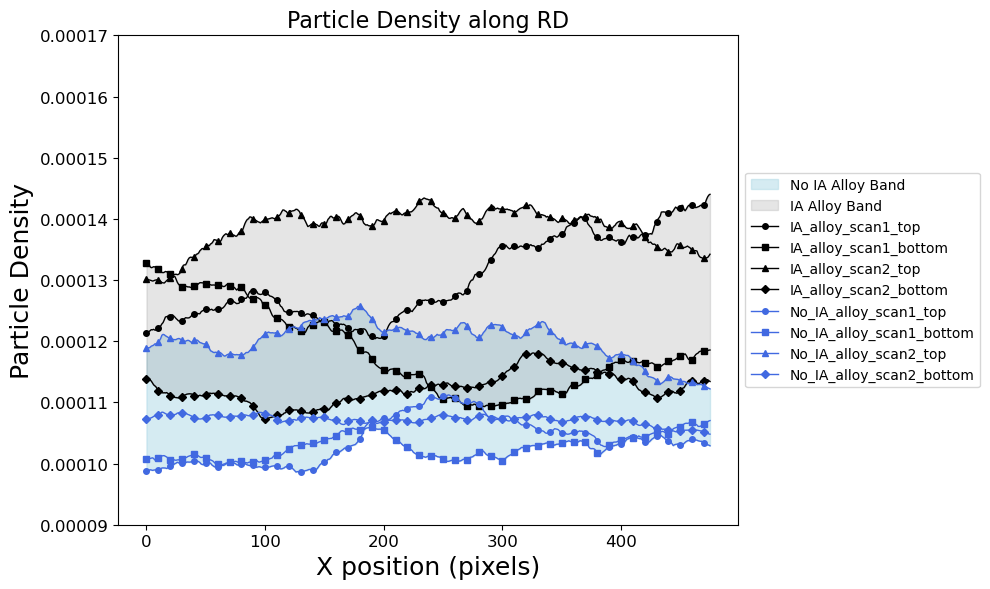

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Step 1: Define the particle density calculation function with normalization
def calculate_particle_density(image, top_threshold, bottom_threshold):
    # Convert the image to grayscale
    gray_image = image.convert('L')  # 'L' mode is for grayscale

    # Convert the grayscale image to a NumPy array
    gray_np = np.array(gray_image)

    # Crop the selected region from the original image
    cropped_band = gray_np[top_threshold:bottom_threshold, :]
    
    # Calculate particle density using the inverse of grayscale intensity
    epsilon = 1e-5
    particle_density = 1 / (np.sum(cropped_band, axis=0) + epsilon)

    return particle_density, cropped_band

# Define the trend calculation function
def calculate_trend(signal, window_size=100):
    return uniform_filter1d(signal, size=window_size)


# Define the top and bottom thresholds for cropping the top surface
top_threshold_top_surface = 0
bottom_threshold_top_surface = 70

# Define the top and bottom thresholds for cropping the bottom surface
top_threshold_bottom_surface = 581
bottom_threshold_bottom_surface = 651


# Initialize dictionary to store trends
trends = {}

# Variable mapping for naming
names = [
    ("IA_alloy_scan1_top", "IA_alloy_scan1_bottom"),
    ("IA_alloy_scan2_top", "IA_alloy_scan2_bottom"),
    ("No_IA_alloy_scan1_top", "No_IA_alloy_scan1_bottom"),
    ("No_IA_alloy_scan2_top", "No_IA_alloy_scan2_bottom")
]

# Define symbols for IA alloy (black) and No IA alloy (default colors)
symbols_IA_alloy = ['o', 's', '^', 'D']  # Symbols for IA alloy
symbols_No_IA_alloy = ['o', 's', '^', 'D']  # Symbols for No IA alloy

# Store all trends for calculating the bands
all_trends_IA = []
all_trends_No_IA = []

# Loop through each image and process
min_len = None  # Initialize min_len to None

# Process the images
for i, image_path in enumerate(image_paths):
    # Load the image
    image = Image.open(image_path)
    
    # Step 1: Calculate particle density for the top surface
    particle_density_top, _ = calculate_particle_density(image, top_threshold_top_surface, bottom_threshold_top_surface)
    
    # Step 2: Calculate particle density for the bottom surface
    particle_density_bottom, _ = calculate_particle_density(image, top_threshold_bottom_surface, bottom_threshold_bottom_surface)
    
    # Step 3: Calculate trends for the top and bottom surfaces
    trend_top = calculate_trend(particle_density_top)
    trend_bottom = calculate_trend(particle_density_bottom)
    
    # Get the minimum length of trends
    if min_len is None:
        min_len = min(len(trend_top), len(trend_bottom))
    else:
        min_len = min(min_len, len(trend_top), len(trend_bottom))
    
    # Store trends for later plotting
    trends[names[i][0]] = trend_top  # Top surface trend
    trends[names[i][1]] = trend_bottom  # Bottom surface trend

    # Append trends for band calculation
    if "No_IA_alloy" in names[i][0]:
        all_trends_No_IA.append(trend_top[:min_len])
        all_trends_No_IA.append(trend_bottom[:min_len])
    else:
        all_trends_IA.append(trend_top[:min_len])
        all_trends_IA.append(trend_bottom[:min_len])

# Step 4: Calculate the bands (minimum and maximum across all visible trends)
if len(all_trends_No_IA) > 0:
    all_trends_No_IA_array = np.vstack([trend[:min_len] for trend in all_trends_No_IA])  # Ensure consistent length
    min_trend_No_IA = np.min(all_trends_No_IA_array, axis=0)
    max_trend_No_IA = np.max(all_trends_No_IA_array, axis=0)

if len(all_trends_IA) > 0:
    all_trends_IA_array = np.vstack([trend[:min_len] for trend in all_trends_IA])  # Ensure consistent length
    min_trend_IA = np.min(all_trends_IA_array, axis=0)
    max_trend_IA = np.max(all_trends_IA_array, axis=0)

# Step 5: Create a figure to plot all particle density trends together
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the light blue band for No IA alloy if trends are visible
if len(all_trends_No_IA) > 0:
    ax.fill_between(np.arange(min_len), min_trend_No_IA, max_trend_No_IA, color='lightblue', alpha=0.5, label='No IA Alloy Band')

# Plot the grey band for IA alloy if trends are visible
if len(all_trends_IA) > 0:
    ax.fill_between(np.arange(min_len), min_trend_IA, max_trend_IA, color='grey', alpha=0.2, label='IA Alloy Band')

# Plot all trends together, with different styles for IA alloy and No IA alloy
for idx, (label, trend) in enumerate(trends.items()):
    trend = trend[:min_len]  # Trim trends to the shortest length
    if "No_IA_alloy" in label:
        symbol = symbols_No_IA_alloy[idx % 4]  
        ax.plot(trend, color='royalblue', marker=symbol, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize
    else:
        symbol2 = symbols_IA_alloy[idx % 4]  
        ax.plot(trend, color='black', marker=symbol2, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize

# Set labels and title
ax.set_xlabel('X position (pixels)', fontsize=18)
ax.set_ylabel('Particle Density', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Particle Density along RD', fontsize=16)

# Add a legend
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside

# Set y-axis limits (optional)
ax.set_ylim(0.00009, 0.00017)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


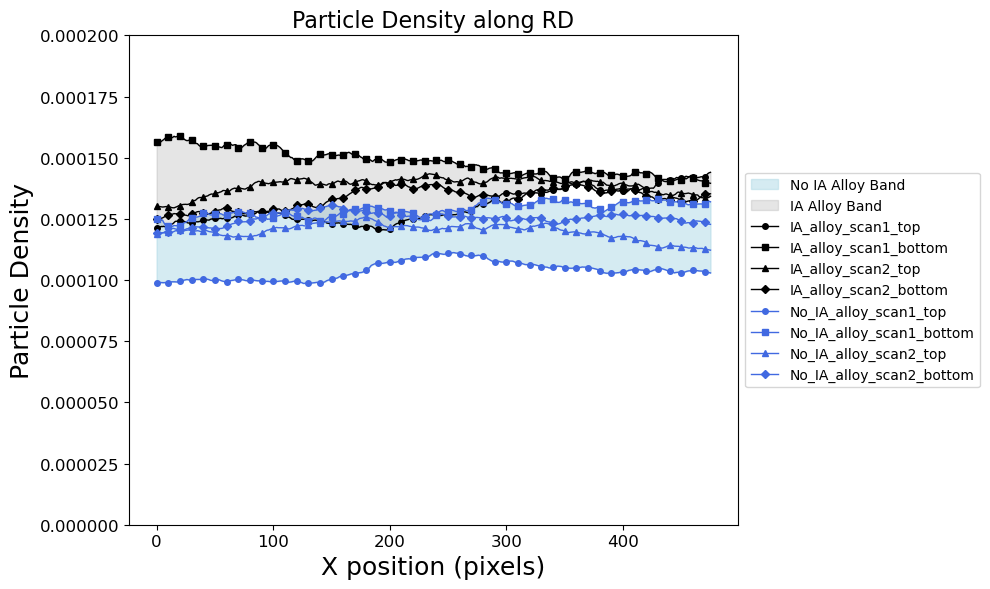

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Step 1: Define the particle density calculation function (without normalization)
def calculate_particle_density(image, top_threshold, bottom_threshold):
    # Convert the image to grayscale
    gray_image = image.convert('L')  # 'L' mode is for grayscale

    # Convert the grayscale image to a NumPy array
    gray_np = np.array(gray_image)

    # Crop the selected region from the original image
    cropped_band = gray_np[top_threshold:bottom_threshold, :]
    
    # Calculate particle density using the inverse of grayscale intensity
    epsilon = 1e-5
    particle_density = 1 / (np.sum(cropped_band, axis=0) + epsilon)

    return particle_density, cropped_band

# Define the trend calculation function
def calculate_trend(signal, window_size=100):
    return uniform_filter1d(signal, size=window_size)


# Set alpha values for controlling visibility (manually set)
alpha_IA_alloy = 0  # Set to 1 to show, 0 to hide IA alloy trends
alpha_No_IA_alloy = 1  # Set to 1 to show, 0 to hide No IA alloy trends




# Define the top and bottom thresholds for cropping the top surface
top_threshold_top_surface = 0
bottom_threshold_top_surface = 70

# Define the top and bottom thresholds for cropping the bottom surface - stretched samples
top_threshold_bottom_surface_stretched = 531  # Define the top threshold (in pixels from the top)
bottom_threshold_bottom_surface_stretched = 601  # Define the bottom threshold (in pixels from the top)




# Initialize dictionary to store trends
trends = {}

# Variable mapping for naming
names = [
    ("IA_alloy_scan1_top", "IA_alloy_scan1_bottom"),
    ("IA_alloy_scan2_top", "IA_alloy_scan2_bottom"),
    ("No_IA_alloy_scan1_top", "No_IA_alloy_scan1_bottom"),
    ("No_IA_alloy_scan2_top", "No_IA_alloy_scan2_bottom")
]

# Define symbols for IA alloy (black) and No IA alloy (default colors)
symbols_IA_alloy = ['o', 's', '^', 'D']  # Symbols for IA alloy
symbols_No_IA_alloy = ['o', 's', '^', 'D']  # Symbols for No IA alloy

# Store all trends for calculating the bands
all_trends_IA = []
all_trends_No_IA = []

# Initialize min_len to the minimum length of all trends (after calculation)
min_len = None

# Process the images
for i, image_path in enumerate(image_paths):
    # Load the image
    image = Image.open(image_path)
    
    # Step 1: Calculate particle density for the top surface
    particle_density_top, _ = calculate_particle_density(image, top_threshold_top_surface, bottom_threshold_top_surface)
    
    # Step 2: Calculate particle density for the bottom surface
    particle_density_bottom, _ = calculate_particle_density(image, top_threshold_bottom_surface_stretched, bottom_threshold_bottom_surface_stretched)
    
    # Step 3: Calculate trends for the top and bottom surfaces
    trend_top = calculate_trend(particle_density_top)
    trend_bottom = calculate_trend(particle_density_bottom)

    # Get the minimum length of trends
    if min_len is None:
        min_len = min(len(trend_top), len(trend_bottom))
    else:
        min_len = min(min_len, len(trend_top), len(trend_bottom))
    
    # Store trends for later plotting
    trends[names[i][0]] = trend_top  # Top surface trend
    trends[names[i][1]] = trend_bottom  # Bottom surface trend

    # Append trends for band calculation
    if "No_IA_alloy" in names[i][0]:
        all_trends_No_IA.append(trend_top[:min_len])
        all_trends_No_IA.append(trend_bottom[:min_len])
    else:
        all_trends_IA.append(trend_top[:min_len])
        all_trends_IA.append(trend_bottom[:min_len])

# Step 4: Calculate the bands (minimum and maximum across all visible trends)
if len(all_trends_No_IA) > 0:
    all_trends_No_IA_array = np.vstack([trend[:min_len] for trend in all_trends_No_IA])  # Ensure consistent length
    min_trend_No_IA = np.min(all_trends_No_IA_array, axis=0)
    max_trend_No_IA = np.max(all_trends_No_IA_array, axis=0)

if len(all_trends_IA) > 0:
    all_trends_IA_array = np.vstack([trend[:min_len] for trend in all_trends_IA])  # Ensure consistent length
    min_trend_IA = np.min(all_trends_IA_array, axis=0)
    max_trend_IA = np.max(all_trends_IA_array, axis=0)

# Step 5: Create a figure to plot all particle density trends together
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the light blue band for No IA alloy if trends are visible
if len(all_trends_No_IA) > 0:
    ax.fill_between(np.arange(min_len), min_trend_No_IA, max_trend_No_IA, color='lightblue', alpha=0.5, label='No IA Alloy Band')

# Plot the grey band for IA alloy if trends are visible
if len(all_trends_IA) > 0:
    ax.fill_between(np.arange(min_len), min_trend_IA, max_trend_IA, color='grey', alpha=0.2, label='IA Alloy Band')

# Plot all trends together, with different styles for IA alloy and No IA alloy
for idx, (label, trend) in enumerate(trends.items()):
    trend = trend[:min_len]  # Trim trends to the shortest length
    if "No_IA_alloy" in label:
        symbol = symbols_No_IA_alloy[idx % 4]  
        ax.plot(trend, color='royalblue', marker=symbol, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize
    else:
        symbol2 = symbols_IA_alloy[idx % 4]  
        ax.plot(trend, color='black', marker=symbol2, linestyle='-', label=f'{label}',
                linewidth=1, markersize=4, markevery=10)  # Adjust linewidth and markersize

# Set labels and title
ax.set_xlabel('X position (pixels)', fontsize=18)
ax.set_ylabel('Particle Density', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Particle Density along RD', fontsize=16)

# Add a legend
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside

# Set y-axis limits (optional)
ax.set_ylim(0, 0.0002)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
